# Time-based Order Analysis (WHEN)

**Objective:**  
Analyze customer ordering behavior across different time periods to identify
peak (Golden Time) and off-peak hours for promotion planning.

In [4]:
import sys
!"{sys.executable}" -m pip install matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable
  Using cached matplotlib-3.10.8-cp313-cp313-win_amd64.whl.metadata (52 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached contourpy-1.3.3-cp313-cp313-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.61.1-cp313-cp313-win_amd64.whl.metadata (116 kB)
  Using cached kiwisolver-1.4.9-cp313-cp313-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-12.1.0-cp313-cp313-win_amd64.whl.metadata (9.0 kB)
  Using cached pyparsing-3.3.1-py3-none-any.whl.metadata (5.6 kB)
Using cached matplotlib-3.10.8-cp313-cp313-win_amd64.whl (8.1 MB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached contourpy-1.3.3-cp313-cp313-win_amd64.whl (226 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.61.1-cp313-cp313-win_amd64.whl (2.3 MB)
Using cached kiwisolver-1.4.9-cp313-cp313-win_amd

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")

In [3]:
df = pd.read_csv("../data/raw/cleaned_zomato.csv")
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Ordered,...,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Time_taken_actual
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,...,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,15.0
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,...,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,10.0
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,...,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,10.0
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,...,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20,10.0
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,...,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,15.0


In [7]:
df[['Order_Date', 'Time_Ordered']].head()

,Order_Date,Time_Ordered
0,12-02-2022,21:55
1,13-02-2022,14:55
2,04-03-2022,17:30
3,13-02-2022,09:20
4,14-02-2022,19:50


In [10]:
df['Time_Ordered'] = pd.to_datetime(
    df['Time_Ordered'],
    format='%H:%M',
    errors='coerce'
)
df['Order_Hour'] = df['Time_Ordered'].dt.hour.astype('Int64')
df['Order_Day'] = pd.to_datetime(df['Order_Date'], dayfirst=True).dt.day_name()
df[['Time_Ordered', 'Order_Hour', 'Order_Day']].head()

,Time_Ordered,Order_Hour,Order_Day
0,1900-01-01 21:55:00,21,Saturday
1,1900-01-01 14:55:00,14,Sunday
2,1900-01-01 17:30:00,17,Friday
3,1900-01-01 09:20:00,9,Sunday
4,1900-01-01 19:50:00,19,Monday


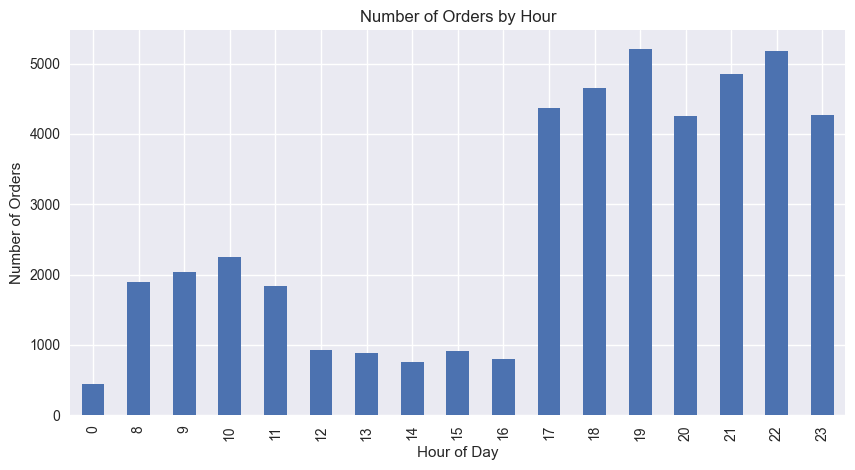

In [11]:
# Orders per Hour
orders_by_hour = df.groupby('Order_Hour').size()

plt.figure(figsize=(10,5))
orders_by_hour.plot(kind='bar')
plt.xlabel("Hour of Day")
plt.ylabel("Number of Orders")
plt.title("Number of Orders by Hour")
plt.show()

**Insight:**  
Orders peak during evening hours (around 17–23),
indicating dinner time as the primary demand window.

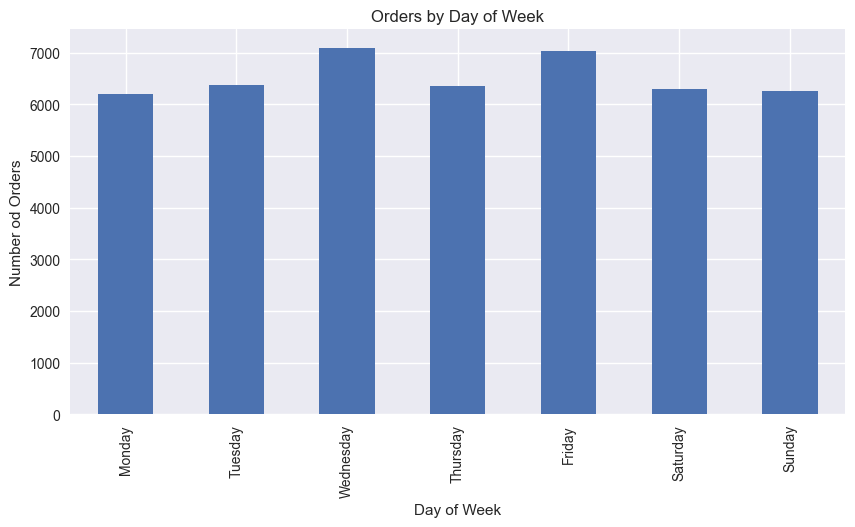

In [12]:
# Orders per Day of Week
orders_by_day = df['Order_Day'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

plt.figure(figsize=(10,5))
orders_by_day.plot(kind='bar')
plt.xlabel("Day of Week")
plt.ylabel("Number od Orders")
plt.title("Orders by Day of Week")
plt.show()

**Insight:**  
Order volume varies across the week, with peaks on Wednesday and Friday,  
indicating higher mid-week and pre-weekend demand.  

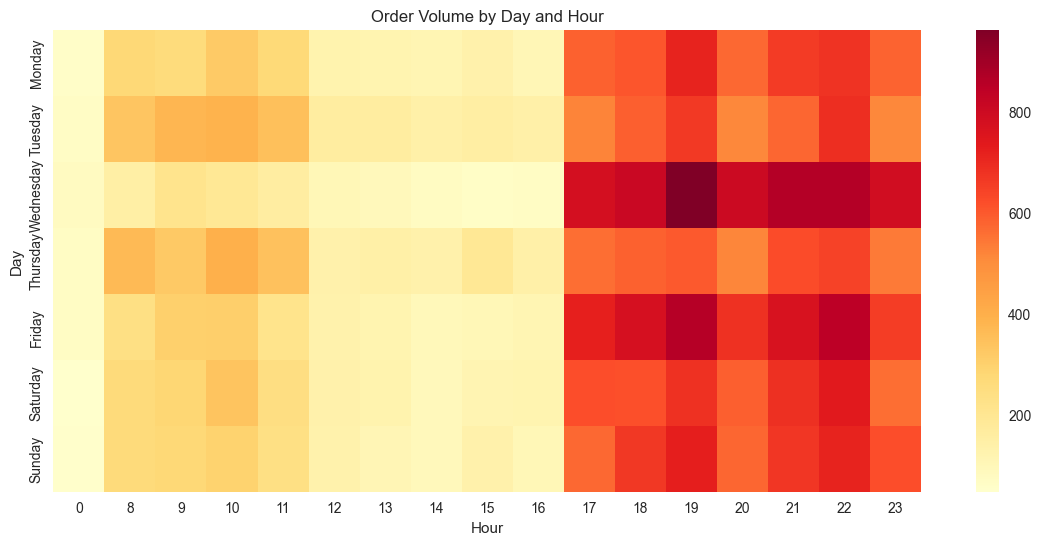

In [14]:
# Heatmap (Day × Hour)
pivot = df.pivot_table(
    index = 'Order_Day',
    columns = 'Order_Hour',
    values = 'ID',
    aggfunc = 'count'
)

pivot = pivot.reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)
plt.figure(figsize=(14,6))
sns.heatmap(pivot, cmap='YlOrRd')
plt.title("Order Volume by Day and Hour")
plt.xlabel("Hour")
plt.ylabel("Day")
plt.show()

**Insight:**  
Orders peak during evening hours (17–23), indicating dinner time as the primary demand window. Order volume varies across the week, with notable peaks on Wednesday and Friday, suggesting higher mid-week and pre-weekend demand.

In [16]:
df['Time_Ordered'] = pd.to_datetime(df['Time_Ordered'], format='%H:%M', errors='coerce').dt.strftime('%H:%M')
df.to_csv("../data/zomato_cleaned_features.csv", index=False)

## Summary

### Key Insights
- **Golden Hours:** 17:00–23:00 Everyday
- **Mid-week / Pre-weekend:** Wednesday & Friday evenings have the highest orders
- **Morning:** 08:00–11:00 moderate orders  
- **Midday:** 12:00–16:00 lowest orders

### Recommendation
- **Focus promotions during dinner peak (17:00–23:00)**  
  Maximize revenue by targeting the hours with the highest order volume.
- **Target mid-week and pre-weekend peaks (Wednesday & Friday evenings)**  
  Schedule special offers or bundles to capture the mid-week and pre-weekend demand.
- **Leverage off-peak hours (morning 08:00–11:00 and midday 12:00–16:00) with targeted promotions**  
  Introduce time-limited deals to increase order volume during low-demand periods without significant marketing spend.